In [1]:
%matplotlib inline


Fit Multiple Data Sets
======================

Fitting multiple (simulated) Gaussian data sets simultaneously.

All minimizers require the residual array to be one-dimensional. Therefore, in
the ``objective`` we need to ```flatten``` the array before returning it.

TODO: this should be using the Model interface / built-in models!


In [57]:
import matplotlib.pyplot as plt
import numpy as np

import lmfit
from lmfit import Parameters, minimize, report_fit


def gauss(x, amp, cen, sigma):
    """Gaussian lineshape."""
    return amp * np.exp(-(x-cen)**2 / (2.*sigma**2))


def gauss_dataset(params, i, x):
    """Calculate Gaussian lineshape from parameters for data set."""
    amp = params['amp_%i' % (i+1)]
    cen = params['cen_%i' % (i+1)]
    sig = params['sig_%i' % (i+1)]
    return gauss(x, amp, cen, sig)

# Objective function for use in minimize implementation
def objective(parameters, x, dat):
    """Calculate total residual for fits of Gaussians to several data sets."""
    ndata, _ = dat.shape
    resid = 0.0*dat[:]

    # make residual per data set
    for i in range(ndata):
        resid[i, :] = dat[i, :] - gauss_dataset(parameters, i, x)

    # now flatten this to a 1D array, as minimize() needs
    return resid.flatten()


In [60]:
ndata, _ = data.shape
resid = 0.0*data[:]

for i in range(ndata):
    resid[i, :] = data[i, :] - gauss_dataset(fit_params, i, x)
    print(np.shape(resid))


(5, 151)
(5, 151)
(5, 151)
(5, 151)
(5, 151)


In [63]:
x

array([-1.  , -0.98, -0.96, -0.94, -0.92, -0.9 , -0.88, -0.86, -0.84,
       -0.82, -0.8 , -0.78, -0.76, -0.74, -0.72, -0.7 , -0.68, -0.66,
       -0.64, -0.62, -0.6 , -0.58, -0.56, -0.54, -0.52, -0.5 , -0.48,
       -0.46, -0.44, -0.42, -0.4 , -0.38, -0.36, -0.34, -0.32, -0.3 ,
       -0.28, -0.26, -0.24, -0.22, -0.2 , -0.18, -0.16, -0.14, -0.12,
       -0.1 , -0.08, -0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06,
        0.08,  0.1 ,  0.12,  0.14,  0.16,  0.18,  0.2 ,  0.22,  0.24,
        0.26,  0.28,  0.3 ,  0.32,  0.34,  0.36,  0.38,  0.4 ,  0.42,
        0.44,  0.46,  0.48,  0.5 ,  0.52,  0.54,  0.56,  0.58,  0.6 ,
        0.62,  0.64,  0.66,  0.68,  0.7 ,  0.72,  0.74,  0.76,  0.78,
        0.8 ,  0.82,  0.84,  0.86,  0.88,  0.9 ,  0.92,  0.94,  0.96,
        0.98,  1.  ,  1.02,  1.04,  1.06,  1.08,  1.1 ,  1.12,  1.14,
        1.16,  1.18,  1.2 ,  1.22,  1.24,  1.26,  1.28,  1.3 ,  1.32,
        1.34,  1.36,  1.38,  1.4 ,  1.42,  1.44,  1.46,  1.48,  1.5 ,
        1.52,  1.54,

In [62]:
ndata = data.shape[0]
resid = 0.0*data[:]

resid_c = []
# make residual per data set
for i in range(ndata):
    resid[i] = data[i] - gauss_dataset(fit_params, i, x[i])
    if resid[i].dtype == np.complex:
        resid_c.append(resid[i].ravel().view(np.float))
    print(np.shape(resid))

(5, 151)
(5, 151)
(5, 151)
(5, 151)
(5, 151)


Create five simulated Gaussian data sets



In [2]:
x = np.linspace(-1, 2, 151)
data = []
for i in np.arange(5):
    params = Parameters()
    amp = 0.60 + 9.50*np.random.rand()
    cen = -0.20 + 1.20*np.random.rand()
    sig = 0.25 + 0.03*np.random.rand()
    dat = gauss(x, amp, cen, sig) + np.random.normal(size=x.size, scale=0.1)
    data.append(dat)
data = np.array(data)

Create five sets of fitting parameters, one per data set



In [3]:
fit_params = Parameters()
for iy, y in enumerate(data):
    fit_params.add('amp_%i' % (iy+1), value=0.5, min=0.0, max=200)
    fit_params.add('cen_%i' % (iy+1), value=0.4, min=-2.0, max=2.0)
    fit_params.add('sig_%i' % (iy+1), value=0.3, min=0.01, max=3.0)

Constrain the values of sigma to be the same for all peaks by assigning
sig_2, ..., sig_5 to be equal to sig_1.



In [4]:
for iy in (2, 3, 4, 5):
    fit_params['sig_%i' % iy].expr = 'sig_1'

Run the global fit and show the fitting result



In [64]:
objective(fit_params, x, data)

array([ 1.04297858e-01, -5.95309747e-02, -1.33342919e-02, -1.43137464e-01,
        9.47480792e-03, -8.82014060e-02, -1.32927291e-01,  2.04049297e-02,
       -1.37533200e-01, -7.13160127e-03,  5.05945086e-02,  3.79345742e-02,
        7.61584796e-02,  2.75708926e-02,  2.64086545e-02,  2.59822604e-01,
        2.88824013e-01,  1.52879708e-02,  2.78411471e-01,  1.73877151e-01,
        2.88461726e-01,  2.99156950e-01,  1.95557888e-01,  4.02103722e-01,
        4.46120961e-01,  2.72796070e-01,  4.47110676e-01,  3.96604149e-01,
        5.29779438e-01,  4.51486830e-01,  6.18824412e-01,  4.10941353e-01,
        6.75664523e-01,  6.24162074e-01,  6.81168117e-01,  7.09435498e-01,
        8.79338556e-01,  7.71765129e-01,  7.84054887e-01,  7.79175310e-01,
        9.74815681e-01,  8.98066697e-01,  1.00932878e+00,  8.09973083e-01,
        6.40136862e-01,  6.98182146e-01,  6.60898531e-01,  7.16764503e-01,
        6.32875443e-01,  5.09087388e-01,  6.60351772e-01,  3.88554397e-01,
        5.61125218e-01,  

In [59]:
out = minimize(objective, fit_params, args=(x, data))
report_fit(out.params)

[[Variables]]
    amp_1:  0.91034486 +/- 0.02409969 (2.65%) (init = 0.5)
    cen_1: -0.15278665 +/- 0.00975748 (6.39%) (init = 0.4)
    sig_1:  0.26099492 +/- 7.4013e-04 (0.28%) (init = 0.3)
    amp_2:  7.94902926 +/- 0.02657370 (0.33%) (init = 0.5)
    cen_2: -0.02421333 +/- 0.00111743 (4.61%) (init = 0.4)
    sig_2:  0.26099492 +/- 7.4013e-04 (0.28%) == 'sig_1'
    amp_3:  6.84349950 +/- 0.02594772 (0.38%) (init = 0.5)
    cen_3:  0.54061115 +/- 0.00129795 (0.24%) (init = 0.4)
    sig_3:  0.26099492 +/- 7.4013e-04 (0.28%) == 'sig_1'
    amp_4:  4.98183580 +/- 0.02508035 (0.50%) (init = 0.5)
    cen_4: -0.09986077 +/- 0.00178299 (1.79%) (init = 0.4)
    sig_4:  0.26099492 +/- 7.4013e-04 (0.28%) == 'sig_1'
    amp_5:  2.89265498 +/- 0.02441210 (0.84%) (init = 0.5)
    cen_5:  0.15839452 +/- 0.00307071 (1.94%) (init = 0.4)
    sig_5:  0.26099492 +/- 7.4013e-04 (0.28%) == 'sig_1'
[[Correlations]] (unreported correlations are < 0.100)
    C(sig_1, amp_2) = -0.424
    C(sig_1, amp_3) = -0.

Plot the data sets and fits



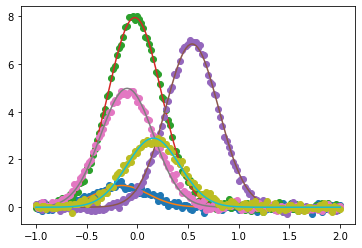

In [48]:
plt.figure()
for i in range(5):
    y_fit = gauss_dataset(out.params, i, x)
    plt.plot(x, data[i, :], 'o', x, y_fit, '-')
plt.show()

Let's see if we can extend to fitting a complex model with the class based approach.
First, definine the basic model equation

In [49]:
class MultiGaussModel(lmfit.model.Model):
    
    def __init__(self, *args, **kwargs):
        super(MultiGaussModel, self).__init__(objective_model, *args, **kwargs)
        
#     def _residual(self, params, data, weights, **kwargs):
#         """Return the residual.
#         Default residual: (data-model)*weights.
#         If the model returns complex values, the residual is computed by
#         treating the real and imaginary parts separately. In this case,
#         if the weights provided are real, they are assumed to apply
#         equally to the real and imaginary parts. If the weights are
#         complex, the real part of the weights are applied to the real
#         part of the residual and the imaginary part is treated
#         correspondingly.
#         Since the underlying scipy.optimize routines expect numpy.float
#         arrays, the only complex type supported is np.complex.
#         The "ravels" throughout are necessary to support pandas.Series.
        
        
#         Customized to accept fitting multiple datasets simultaneously.
#         """
#         model = self.eval(params, **kwargs)
#         if self.nan_policy == 'raise' and not np.all(np.isfinite(model)):
#             msg = ('The model function generated NaN values and the fit '
#                    'aborted! Please check your model function and/or set '
#                    'boundaries on parameters where applicable. In cases like '
#                    'this, using "nan_policy=\'omit\'" will probably not work.')
#             raise ValueError(msg)

#         diff = model - data

#         if diff.dtype == np.complex:
#             # data/model are complex
#             diff = diff.ravel().view(np.float)
#             if weights is not None:
#                 if weights.dtype == np.complex:
#                     # weights are complex
#                     weights = weights.ravel().view(np.float)
#                 else:
#                     # real weights but complex data
#                     weights = (weights + 1j * weights).ravel().view(np.float)
#         if weights is not None:
#             diff *= weights
#         return np.asarray(diff).ravel()  # for compatibility with pandas.Series

In [11]:
fit_params

name,value,initial value,min,max,vary,expression
amp_1,0.50000000,0.5,0.00000000,200.000000,True,
cen_1,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_1,0.30000000,0.3,0.01000000,3.00000000,True,
amp_2,0.50000000,0.5,0.00000000,200.000000,True,
cen_2,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_2,0.30000000,0.3,0.01000000,3.00000000,False,sig_1
amp_3,0.50000000,0.5,0.00000000,200.000000,True,
cen_3,0.40000000,0.4,-2.00000000,2.00000000,True,
sig_3,0.30000000,0.3,0.01000000,3.00000000,False,sig_1
amp_4,0.50000000,0.5,0.00000000,200.000000,True,


In [50]:
multigauss = MultiGaussModel()

In [51]:
result = multigauss.fit(data, fit_params)

ValueError: Assign each parameter an initial value by passing Parameters or keyword arguments to fit.
Missing parameters: ['parameters', 'dat']
Non initialized parameters: []